# Referral Prediction
## ( Simple Linear Regression)

## Reading and Understanding the Data

In [65]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [68]:
sikka = pd.DataFrame(pd.read_csv("Q3_Sikka data.csv"))
test = pd.DataFrame(pd.read_excel("test.xlsx"))
sikka=sikka.iloc[:, 0:6] 
sikka.head()

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,01-10-2022,24071,6630,6994,3511,962
1,02-10-2022,23548,6366,6669,3387,941
2,03-10-2022,24572,6936,6899,3654,940
3,04-10-2022,24212,6561,6766,3532,960
4,05-10-2022,23247,6059,6402,3315,923


## Data Inspection

In [18]:
sikka.shape

(46, 6)

In [19]:
sikka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        46 non-null     object 
 1   DAU         46 non-null     int64  
 2   Installs    46 non-null     int64  
 3   Uninstalls  46 non-null     int64  
 4   Signups     46 non-null     int64  
 5   Referrals   46 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ KB


In [20]:
sikka.describe()

,DAU,Installs,Uninstalls,Signups,Referrals
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,17788.586957,5064.978261,5494.347826,2550.891304,652.060870
std,4892.080923,1624.796773,1402.885078,991.987348,267.162665
min,12042.000000,3074.000000,3815.000000,1363.000000,354.000000
25%,13380.250000,3708.750000,4321.250000,1729.500000,421.025000
50%,15059.500000,4479.500000,4738.000000,2065.500000,543.500000
75%,23472.750000,6332.000000,6741.750000,3369.000000,935.750000
max,25156.000000,8937.000000,8215.000000,4974.000000,1193.000000


## Data Cleaning

In [21]:
# Checking Null values
sikka.isnull().sum()*100/sikka.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Date          0.0
DAU           0.0
Installs      0.0
Uninstalls    0.0
Signups       0.0
Referrals     0.0
dtype: float64

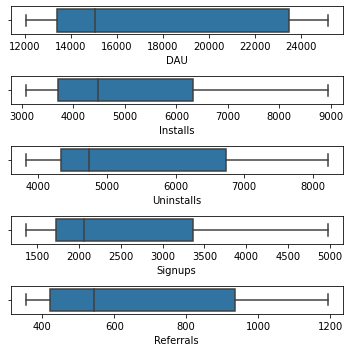

In [30]:
# Outlier Analysis
fig, axs = plt.subplots(5, figsize = (5,5))
plt1 = sns.boxplot(sikka['DAU'], ax = axs[0])
plt2 = sns.boxplot(sikka['Installs'], ax = axs[1])
plt3 = sns.boxplot(sikka['Uninstalls'], ax = axs[2])
plt3 = sns.boxplot(sikka['Signups'], ax = axs[3])
plt3 = sns.boxplot(sikka['Referrals'], ax = axs[4])
plt.tight_layout()

In [26]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

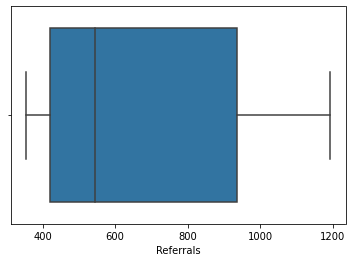

In [29]:
sns.boxplot(sikka['Referrals'])
plt.show()

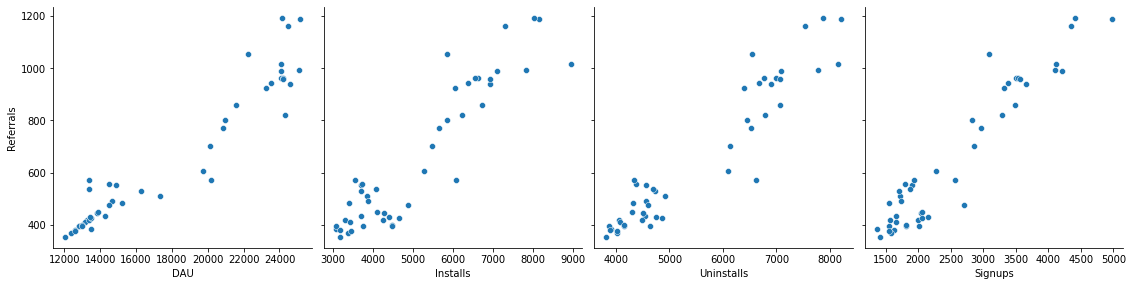

In [31]:
# Let's see how referrals are related with other variables using scatter plot.
sns.pairplot(sikka, x_vars=['DAU', 'Installs', 'Uninstalls','Signups'], y_vars='Referrals', height=4, aspect=1, kind='scatter')
plt.show()

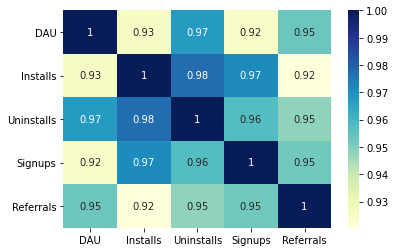

In [32]:
# Let's see the correlation between different variables.
sns.heatmap(sikka.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, all the variables seem to be correlated with `Referrals`. So let's go ahead and perform simple linear regression using all as our feature variable.

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels` and Linear Regression

We first assign the feature variable, to the variable `X` and the response variable, `Referrals`, to the variable `y`.

In [48]:
sikka.head()

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,01-10-2022,24071,6630,6994,3511,962.0
1,02-10-2022,23548,6366,6669,3387,941.0
2,03-10-2022,24572,6936,6899,3654,940.0
3,04-10-2022,24212,6561,6766,3532,960.0
4,05-10-2022,23247,6059,6402,3315,923.0


In [49]:
X = sikka[['DAU','Installs','Uninstalls','Signups']]
y = sikka['Referrals']

In [62]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression Object
lm1 = LinearRegression()
X1 = sikka[['DAU','Installs','Uninstalls','Signups']]
Y1 = sikka['Referrals'] # Target

# Fit (Train) the model
lm1.fit(X1,Y1)

print("Intercept for the model is", lm1.intercept_, "and the scope is",lm1.coef_)

# Prediction
Yout1 = lm1.predict(X1)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout1[0:5])
print("Actual Values:",Y1.values[0:5])

Intercept for the model is -185.42264144979185 and the scope is [ 0.02147936 -0.09788852  0.07319938  0.21522534]
Predicted Values: [950.21873898 914.34986362 954.84929208 947.83191008 902.89589412]
Actual Values: [962. 941. 940. 960. 923.]


In [71]:
testing=test[['DAU','Installs','Uninstalls','Signups']]

In [78]:
prediction=lm1.predict(testing)
pd.DataFrame(prediction)

,0
0,413.903506
1,404.323518
2,345.061219
3,409.076768
4,382.201919
5,414.948034
6,373.481453
7,348.577802
8,427.628072
9,442.541977


In [77]:
pd.DataFrame(testing)

,DAU,Installs,Uninstalls,Signups
0,12816,3763,4149,1806
1,12812,3087,3868,1550
2,12042,3176,3815,1410
3,12595,3172,3878,1629
4,12361,3390,4021,1578
5,13166,3441,4071,1656
6,12565,3468,4011,1556
7,12988,4468,4143,1808
8,12992,4491,4638,2017
9,13377,4261,4480,1997
